In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__,torchvision.__version__

('2.1.2', '0.16.2')

In [3]:
# setup training data
train_data=datasets.FashionMNIST(
    root="data", # 
    train=True,
    download=True,
    transform=ToTensor(), # images come in form of PIL format, we want to turn it into torch tensors
    target_transform=None # you can transoform label as well
)

# setup testing data
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(test_data.data), len(train_data.targets), len(train_data.targets)

(60000, 10000, 60000, 60000)

In [7]:
# see classes
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

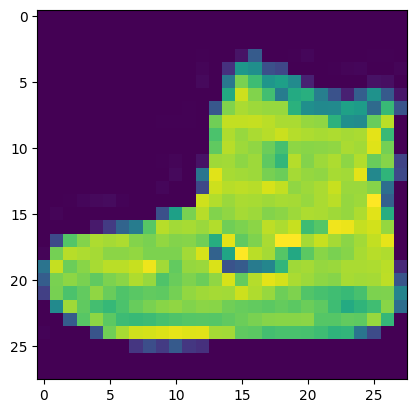

In [8]:
plt.imshow(image.squeeze())

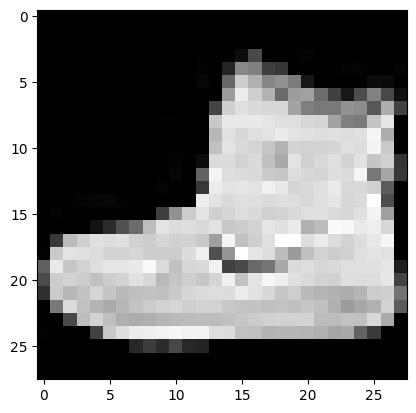

In [9]:

plt.imshow(image.squeeze(),cmap="gray")

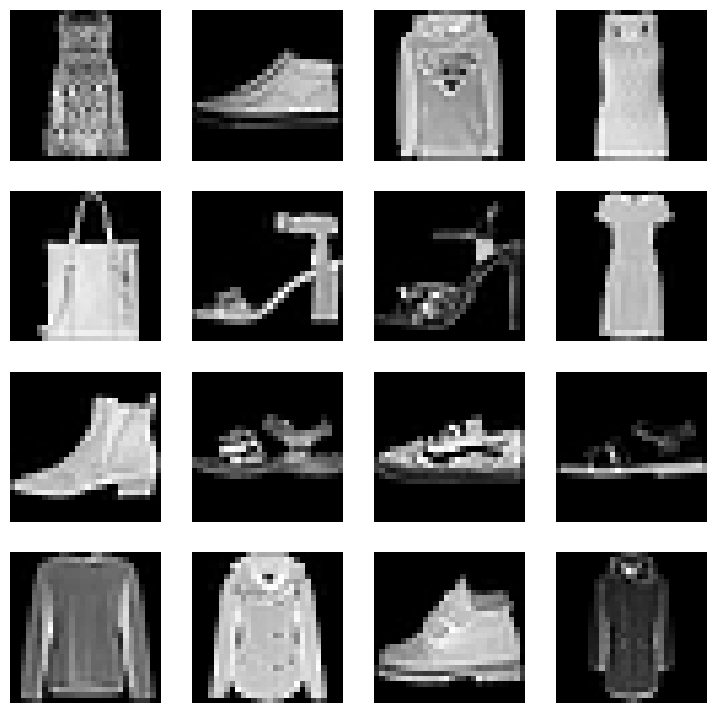

In [10]:
torch.manual_seed(29)

fig=plt.figure(figsize=(9,9))
rows, cols=4, 4

for i in range(1, rows*cols +1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis(False);

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

# turn dataset into batches
train_dataloader=DataLoader(
    train_data, 
    batch_size=BATCH_SIZE,
    shuffle=True # shuffle data every epoch
)

test_dataloader=DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False, # don't necessarily have to shuffle test data
)

print(train_dataloader,test_dataloader)
print(len(train_dataloader),BATCH_SIZE)
print(len(test_dataloader),BATCH_SIZE)

<torch.utils.data.dataloader.DataLoader object at 0x7c7dccadada0> <torch.utils.data.dataloader.DataLoader object at 0x7c7dccadac80>
1875 32
313 32


In [12]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [13]:
# create a flatten layer
flatten_model=nn.Flatten() # 

X=train_features_batch[0]

#flatten the sample
ouput=flatten_model(X)

print(f"{X.shape} -> [color_channels, height, width]")
print(f"{ouput.shape} -> [color_channels, height*width]")

torch.Size([1, 28, 28]) -> [color_channels, height, width]
torch.Size([1, 784]) -> [color_channels, height*width]


In [14]:
class fashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
        
    def forward(self,x):
        return self.layer_stack(x)

In [15]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
model_0=fashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to(device)

fashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    pass
else:
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

In [18]:
# from helper_functions import accuracy_fn

import torchmetrics
acc_fun=torchmetrics.Accuracy(task="multiclass",num_classes=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss() # 
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [19]:
from timeit import default_timer as timer 
def print_train_time(start,end,device=None):
    total_time=end-start
    print(device,total_time)
    return total_time

In [20]:
from tqdm.auto import tqdm

In [21]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"epoch:{epoch}")
    train_loss=0
    
    # add a loop to loop through training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred=model_0(X)
        
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch%400 == 0:
            print(f"{batch*len(X)} / {len(train_dataloader.dataset)} \n")
                                    
        # divide total train loss by length of train dataloader
    test_loss, test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_pred=model_0(X)
                                    
            test_loss+=loss_fn(test_pred,y)
                                    
            test_acc+=acc_fun(y,test_pred.argmax(dim=1))
                                    
        test_loss/=len(test_dataloader)
                                    
        test_acc/=len(test_dataloader)
        print(f"{train_loss}, {test_loss}, {test_acc}")
                                    
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                             end=train_time_end_on_cpu,
                                             device=str(next(model_0.parameters()).device)
                                             )

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [22]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
    loss, acc=0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred=model(X)
            
            loss=loss_fn(y_pred,y)
            acc+=accuracy_fn(y,y_pred.argmax(dim=1))
        loss/=len(data_loader)
        acc/=len(data_loader)
        
    return model.__class__.__name__, loss.item(),acc

model_0_res=eval_model(model_0,test_dataloader,loss_fn,acc_fun)
model_0_res

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [23]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
class fashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x):
        return self.layer_stack(x)
    

In [25]:
model_1=fashionMNISTModelV1(784,10,len(class_names)).to(device)
next(model_1.parameters()),device

(Parameter containing:
 tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
         [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
         [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
         ...,
         [-0.0344,  0.0127, -0.0325,  ..., -0.0011, -0.0230,  0.0257],
         [ 0.0291,  0.0243, -0.0006,  ...,  0.0001,  0.0176, -0.0147],
         [ 0.0053, -0.0194, -0.0170,  ...,  0.0205, -0.0093,  0.0283]],
        device='cuda:0', requires_grad=True),
 'cuda')

In [26]:
loss_fun=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [27]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)

print(f"{x.shape} -> [color_channels, height, width]")
print(f"{output.shape} -> [color_channels, height, width]")

torch.Size([1, 28, 28]) -> [color_channels, height, width]
torch.Size([1, 784]) -> [color_channels, height, width]


In [28]:
def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device=device):
#     device=torch.device
    
    train_loss, train_acc=0, 0
    model_1.to(device)
    for batch, (X,y) in enumerate(data_loader):
        X,y=X.to(device), y.to(device)
        
        y_pred=model(X)
        
        loss=loss_fun(y_pred,y)
        train_loss+=loss
        train_acc=accuracy_fn(y,y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(train_loss,train_acc,)
    
def test_step(model,data_loader,loss_fun,accuracy_fn,device=device):
    test_loss, test_acc=0, 0
    model_1.to(device, torch.float32, non_blocking=True)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X,y =X.to(device), y.to(device)
            
            test_pred=model_1(X)
            
            test_loss+=loss_fun(test_pred,y)
            
            test_acc+=accuracy_fn(y,test_pred.argmax(dim=1))
            
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        
        print(test_loss,test_acc)

In [29]:
torch.manual_seed(29)

from timeit import default_timer as timer
train_time_start_on_gpu=timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(epoch)
    
    train_step(data_loader=train_dataloader,model=model_1,loss_fn=loss_fun,optimizer=optimizer,accuracy_fn=acc_fun)
    
    test_step(data_loader=test_dataloader,model=model_1,loss_fun=loss_fun,accuracy_fn=acc_fun)
    
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

0
tensor(0.8912, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0004, device='cuda:0')
tensor(0.7287, device='cuda:0') tensor(0.7428, device='cuda:0')
1
tensor(0.6932, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0004, device='cuda:0')
tensor(0.7100, device='cuda:0') tensor(0.7354, device='cuda:0')
2
tensor(0.6642, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0004, device='cuda:0')
tensor(0.7002, device='cuda:0') tensor(0.7435, device='cuda:0')
cuda 34.2675575559997


In [31]:
torch.manual_seed(29)

# this will error dur to model_eval not usinf device agnostic code
model_1_res=eval_model(model=model_1,
                      data_loader=test_dataloader,
                      loss_fn=loss_fun,
                      accuracy=acc_fun)
model_1_res

TypeError: eval_model() got an unexpected keyword argument 'accuracy'

In [32]:
torch.manual_seed(29)
def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              acc_fn,
              device:torch.device=device):
    loss, acc=0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device), y.to(device)
            y_pred=model_1(X)
            loss+=loss_fn(y_pred,y)
            acc+=acc_fn(y,y_pred.argmax(dim=1))
            
        loss/=len(data_loader)
        acc/=len(data_loader)
    return model.__class__.__name__, loss.item(), acc

model_1_res=eval_model(model_1,test_dataloader,loss_fun,acc_fun)
model_1_res

('fashionMNISTModelV1', 0.7002291083335876, tensor(0.7435, device='cuda:0'))

In [33]:
# craete a convolutional neural network class
class fashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1), # "valid" for no padding, "same" for output has same shape as input, or any integer),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block_2=nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x=self.block_1(x)
        x=self.block_2(x)
        x=self.classifier(x)
        return x
        
torch.manual_seed(29)
model_2=fashionMNISTModelV2(1,10,len(class_names)).to(device)
model_2

fashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
torch.manual_seed(29)

images=torch.randn(size=(32,3,64,64))

test_image=images[0]

print(f"{images.shape} -> [batch_size, color_channels, height,width]")
print(f"{test_image.shape} -> [color_channels, height,width]")
print(test_image)

torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height,width]
torch.Size([3, 64, 64]) -> [color_channels, height,width]
tensor([[[ 4.0617e-01, -1.0406e+00,  1.1034e+00,  ..., -5.2968e-01,
           5.6249e-01,  6.4274e-01],
         [-5.2064e-01, -7.9903e-01, -7.3069e-01,  ...,  3.8110e-01,
          -5.1557e-01, -1.4197e+00],
         [-1.0653e+00, -3.9297e-01, -3.6014e-01,  ..., -3.7003e-01,
          -3.7279e-01,  1.3251e+00],
         ...,
         [-6.0478e-01,  9.4040e-01, -1.0730e+00,  ...,  5.1264e-02,
          -2.9131e-01, -1.8820e+00],
         [ 3.3276e-01,  2.1421e-01,  5.8760e-01,  ...,  1.2316e+00,
           7.0367e-01,  7.7974e-01],
         [-1.3960e+00, -1.4287e+00, -3.2658e-01,  ..., -8.1370e-02,
           1.9714e-01,  2.6108e-01]],

        [[ 2.6890e-04,  7.6654e-01,  8.5702e-02,  ..., -1.7009e+00,
           4.9095e-02, -2.3881e-01],
         [-1.3139e+00, -8.9248e-01,  2.0874e+00,  ...,  3.5698e-02,
          -9.0322e-01,  9.0033e-02],
         [ 1

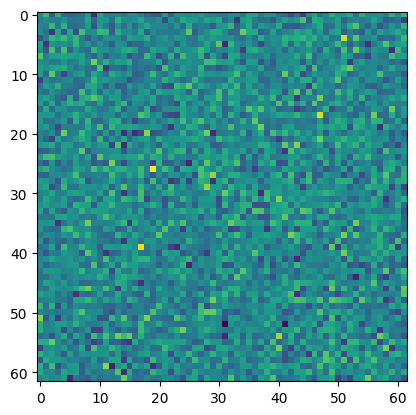

In [35]:
torch.manual_seed(29)

#createa convolutional layer with same dimensoins as tinyVGG
conv_layer=nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=3,
                    stride=1,
                    padding="valid")
img=conv_layer(test_image)
img = img[0].detach().numpy()
# plt.imshow(img)
plt.imshow(img)

In [36]:
# add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [37]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [38]:
conv_layer_2=nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=5,
                    stride=1,
                    padding=3)

conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 66, 66])

In [39]:
# check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0031, -0.0792,  0.0463,  0.0471,  0.0308],
          [ 0.0755,  0.0082,  0.0170, -0.0450, -0.0255],
          [ 0.0560, -0.0352, -0.1105, -0.0115,  0.0478],
          [ 0.0226,  0.0255,  0.0149, -0.0406, -0.0725],
          [-0.0503, -0.0418, -0.0936,  0.1112,  0.0470]],

         [[-0.0166,  0.1063, -0.0642, -0.0477, -0.1014],
          [ 0.0253, -0.0195, -0.0659, -0.0875, -0.0752],
          [-0.0535, -0.0657,  0.0213, -0.1026,  0.1035],
          [ 0.0847,  0.0371,  0.0030, -0.0868, -0.0453],
          [ 0.0527,  0.0105, -0.0775,  0.0281, -0.1100]],

         [[ 0.0767, -0.0533,  0.0679,  0.0648,  0.0015],
          [-0.1132, -0.0885, -0.0907,  0.0125,  0.0245],
          [ 0.0653,  0.0390, -0.1026,  0.1026,  0.0650],
          [ 0.1123,  0.0256, -0.0942, -0.0015, -0.0560],
          [-0.1071, -0.0626, -0.0488,  0.0246,  0.0103]]],


        [[[ 0.0324, -0.0235,  0.0793,  0.1138,  0.1021],
          [ 0.0832, -0.0385, -0.0541, -0.0412, -0.0531],

In [40]:
conv_layer_2.weight.shape, conv_layer_2.bias.shape

(torch.Size([10, 3, 5, 5]), torch.Size([10]))

In [41]:
print(test_image.shape)
print(test_image.unsqueeze(dim=0).shape)

max_pool_layer=nn.MaxPool2d(kernel_size=2)

test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)

test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(test_image_through_conv_and_max_pool.shape)


torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [42]:
torch.manual_seed(29)

random_tensor=torch.randn(size=(1,1,2,2))
print(random_tensor,random_tensor.shape)

max_pool_layer=nn.MaxPool2d(kernel_size=2)

max_pool_tensor=max_pool_layer(random_tensor)

print(max_pool_tensor,max_pool_tensor
      .shape)

tensor([[[[ 1.1474, -0.1417],
          [ 0.4743,  0.0876]]]]) torch.Size([1, 1, 2, 2])
tensor([[[[1.1474]]]]) torch.Size([1, 1, 1, 1])


In [43]:
loss_fun=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                         lr=0.01)

In [44]:
torch.manual_seed(29)

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(epoch)
    
    train_step(model_2, train_dataloader, loss_fun, optimizer, acc_fun, device)
    
    test_step(model_2, test_dataloader, loss_fun,acc_fun,device)
    
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(train_time_start_model_2,train_time_end_model_2,device)

  0%|          | 0/3 [00:00<?, ?it/s]

0
tensor(1.5172, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0004, device='cuda:0')
tensor(0.7002, device='cuda:0') tensor(0.7435, device='cuda:0')
1
tensor(0.6205, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0005, device='cuda:0')
tensor(0.7002, device='cuda:0') tensor(0.7435, device='cuda:0')
2
tensor(0.4871, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0005, device='cuda:0')
tensor(0.7002, device='cuda:0') tensor(0.7435, device='cuda:0')
cuda 40.52541948700036


In [45]:
model_2_res=eval_model(model_2,test_dataloader, loss_fun, acc_fun)
model_2_res

('fashionMNISTModelV2', 0.7002291083335876, tensor(0.7435, device='cuda:0'))

In [46]:
import pandas as pd
compare_res=pd.DataFrame([model_1_res, model_2_res])
compare_res

,0,1,2
0,fashionMNISTModelV1,0.700229,"tensor(0.7435, device='cuda:0')"
1,fashionMNISTModelV2,0.700229,"tensor(0.7435, device='cuda:0')"


In [47]:
compare_res["training_time"]=[total_train_time_model_1,total_train_time_model_2]
compare_res

,0,1,2,training_time
0,fashionMNISTModelV1,0.700229,"tensor(0.7435, device='cuda:0')",34.267558
1,fashionMNISTModelV2,0.700229,"tensor(0.7435, device='cuda:0')",40.525419


<Axes: xlabel='0'>

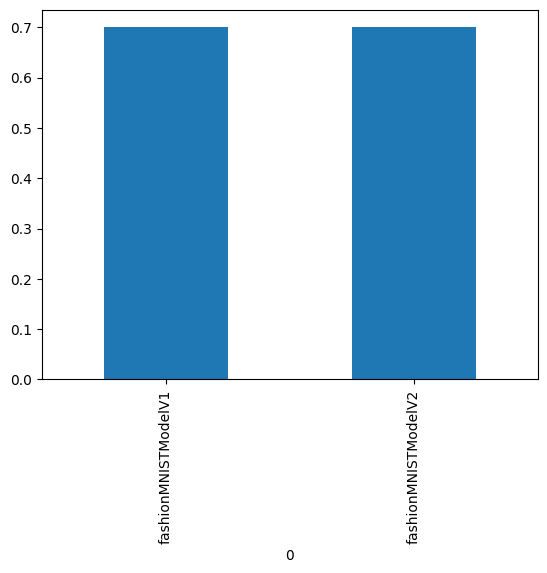

In [48]:
# visualize our model results
compare_res.set_index(0)[1].plot(kind="bar")

In [49]:
def make_predictions(model:torch.nn.Module, data: list, device:torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logit=model(sample)
            
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
            
            pred_probs.append(pred_prob.cpu()) # perform softmax on the "logits" deimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)
    return torch.stack(pred_probs)

In [50]:
import random 
random.seed(29)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
print(test_samples[0].shape, test_labels[0], class_names[test_labels[0]])

torch.Size([1, 28, 28]) 5 Sandal


In [51]:
pred_probs=make_predictions(model=model_2, data=test_samples)

pred_probs[:1]

tensor([[1.1446e-04, 2.1973e-07, 4.5377e-06, 1.9839e-05, 8.5064e-07, 8.7908e-01,
         3.8904e-05, 2.9948e-02, 9.3609e-03, 8.1429e-02]])

In [52]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 3, 4, 3, 5, 3, 8, 0])

In [53]:
test_labels,pred_classes

([5, 4, 3, 4, 3, 5, 3, 8, 0], tensor([5, 4, 3, 4, 3, 5, 3, 8, 0]))

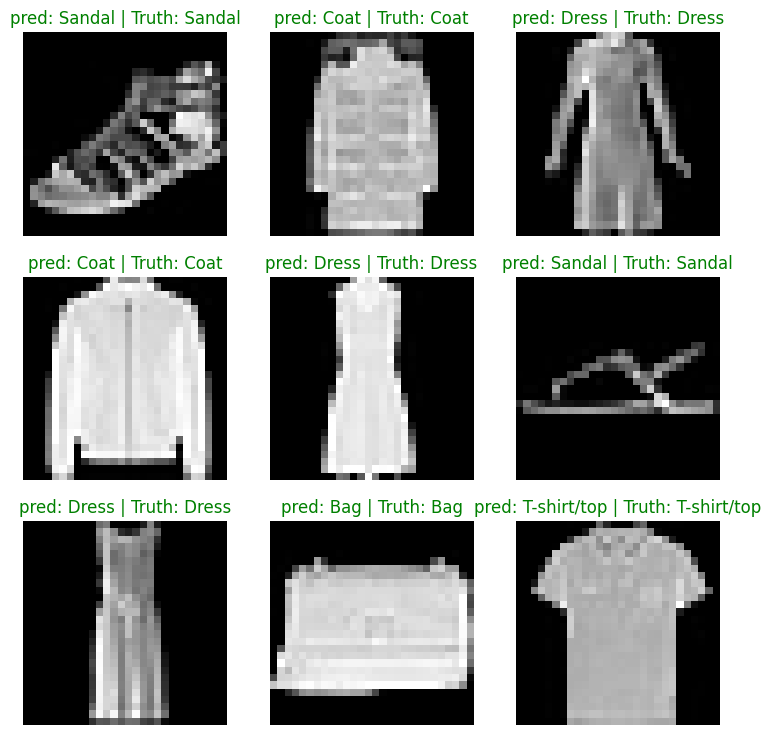

In [54]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    pred_label=class_names[pred_classes[i]]
    
    truth_label=class_names[test_labels[i]]
    title_text=f"pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label==truth_label:
        plt.title(title_text,c="g")
    else:
        plt.titl(title_text,c="r")
    plt.axis(False)

In [55]:
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="making predictions"):
        X, y=X.to(device), y.to(device)
        
        y_logit=model_2(X)
        
        y_pred=torch.softmax(y_logit, dim=1).argmax(dim=1) # perform softmXax on the "logits" dimension, not "batch" dimension(in this case we have a batch size of 32, so we can preform on dim=1)
        
        y_preds.append(y_pred.cpu())
        
y_pred_tensor=torch.cat(y_preds)

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [56]:
try:
    import torchmetrics, mlxtend
    print(mlxtend.__version__)
    assert int(mlxtend.__version__.split(".")[1])>=19, "it should be higher"
except:
    !pip install -q torchmetrics -U mlextend
    import torchmetrics, mlxtend
    print(mlxtend.__version__)

0.23.1


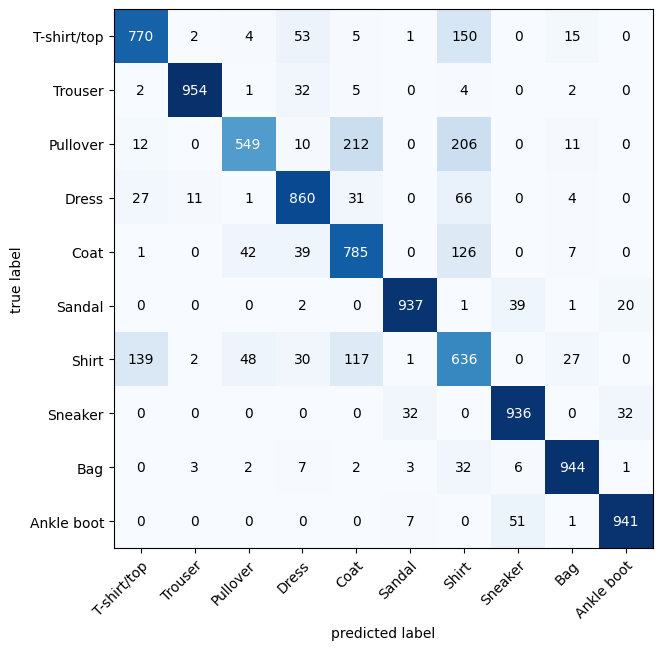

In [57]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor=confmat(y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(18,7)
)

In [58]:
from pathlib import Path
MODEL_PATH=Path("models")

MODEL_PATH.mkdir(parents=True, # create parents dorectory if needed
                exist_ok=True) 

MODEL_NAME="pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

models/pytorch_computer_vision_model_2.pth


In [59]:
loaded_model=fashionMNISTModelV2(input_shape=1,
                                 hidden_units=10,
                                 output_shape=10)

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

fashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [60]:
torch.manual_seed(29)

loaded_model_res=eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fun,
    acc_fn=acc_fun
)
loaded_model_res

('fashionMNISTModelV2', 0.7002291083335876, tensor(0.7435, device='cuda:0'))

In [61]:
torch.isclose(torch.tensor(model_2_res[1]),
             torch.tensor(loaded_model_res[1]),
             atol=1e-08, # absolute tolerance
              rtol=0.0001, #  realetive tolerance
             )

tensor(True)

# Exercise

## 1] Load the torchvision.datasets.MNIST() train and test datasets.


In [62]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__,torchvision.__version__

('2.1.2', '0.16.2')

## 2] Visualize at least 5 different samples of the MNIST training dataset.

In [63]:
# see classes
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

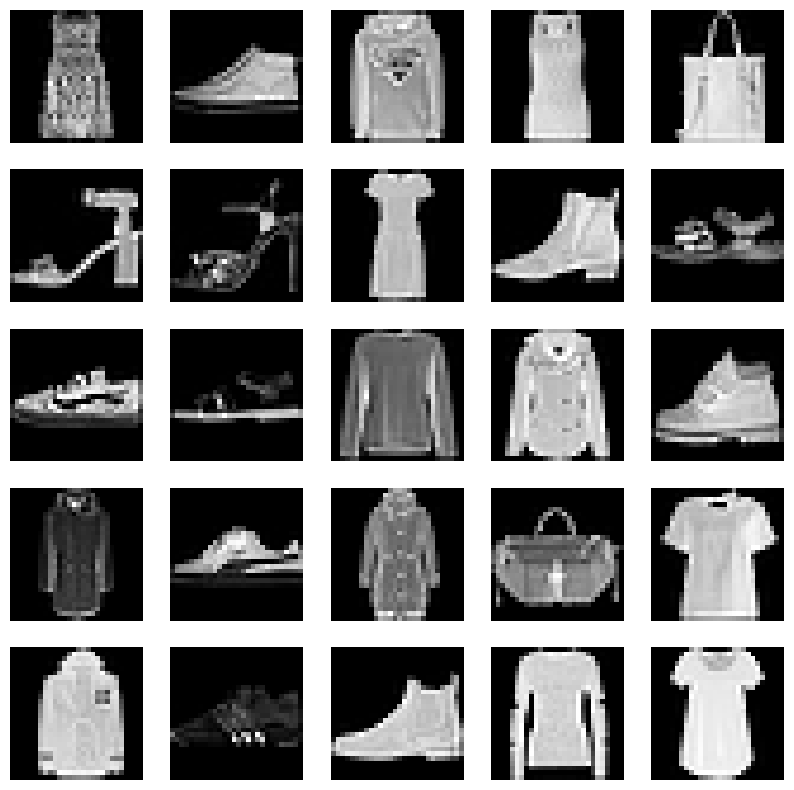

In [64]:
torch.manual_seed(29)

fig=plt.figure(figsize=(10,10))
rows, cols=5, 5

for i in range(1, rows*cols +1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis(False);


## 3] Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.


In [65]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

# turn dataset into batches
train_dataloader=DataLoader(
    train_data, 
    batch_size=BATCH_SIZE,
    shuffle=True # shuffle data every epoch
)

test_dataloader=DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False, # don't necessarily have to shuffle test data
)

print(train_dataloader,test_dataloader)
print(len(train_dataloader),BATCH_SIZE)
print(len(test_dataloader),BATCH_SIZE)

<torch.utils.data.dataloader.DataLoader object at 0x7c7d2119d8d0> <torch.utils.data.dataloader.DataLoader object at 0x7c7dccadb040>
1875 32
313 32


In [66]:


device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 4] Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.


In [67]:
# craete a convolutional neural network class
class fashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
#                      stride=1,
                     padding=1), # "valid" for no padding, "same" for output has same shape as input, or any integer),
            nn.ReLU(),
        )
        self.block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
#                      stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block_3=nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
        )
        self.block_4=nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x=self.block_1(x)
        x=self.block_2(x)
        x=self.block_3(x)
        x=self.block_4(x)
        x=self.classifier(x)
        return x
        
torch.manual_seed(29)
model_e=fashionMNISTModelV2(1,10,len(class_names)).to(device)
model_e

fashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 5] Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.


In [68]:
def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device=device):
#     device=torch.device
    
    train_loss, train_acc=0, 0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):
        X,y=X.to(device), y.to(device)
        
        y_pred=model(X)
        
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        train_acc=accuracy_fn(y,y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(train_loss,train_acc,)
    
def test_step(model,data_loader,loss_fun,accuracy_fn,device=device):
    test_loss, test_acc=0, 0
    model.to(device, torch.float32, non_blocking=True)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X,y =X.to(device), y.to(device)
            
            test_pred=model(X)
            
            test_loss+=loss_fun(test_pred,y)
            
            test_acc+=accuracy_fn(y,test_pred.argmax(dim=1))
            
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        
        print(test_loss,test_acc)

In [69]:
# from helper_functions import accuracy_fn

import torchmetrics
acc_fun=torchmetrics.Accuracy(task="multiclass",num_classes=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss() # 
optimizer=torch.optim.SGD(params=model_e.parameters(),lr=0.01)

In [70]:
from timeit import default_timer as timer 
def print_train_time(start,end,device=None):
    total_time=end-start
    print(device,total_time)
    return total_time

In [71]:
from tqdm.auto import tqdm
torch.manual_seed(29)

from timeit import default_timer as timer
train_time_start_on_gpu=timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(epoch)
    
    train_step(data_loader=train_dataloader,model=model_e,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=acc_fun)
    
    test_step(data_loader=test_dataloader,model=model_e,loss_fun=loss_fn,accuracy_fn=acc_fun)
    
train_time_end_on_gpu=timer()
total_train_time_model_e=print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

0
tensor(1.5172, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0004, device='cuda:0')
tensor(0.6931, device='cuda:0') tensor(0.7514, device='cuda:0')
1
tensor(0.6205, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0005, device='cuda:0')
tensor(0.5489, device='cuda:0') tensor(0.7953, device='cuda:0')
2
tensor(0.4873, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0005, device='cuda:0')
tensor(0.4657, device='cuda:0') tensor(0.8311, device='cuda:0')
cuda 40.44231075599964


## 6] Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.


In [72]:
def make_predictions(model:torch.nn.Module, data: list, device:torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logit=model(sample)
            
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
            
            pred_probs.append(pred_prob.cpu()) # perform softmax on the "logits" deimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)
    return torch.stack(pred_probs)

In [73]:
import random 
random.seed(29)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
print(test_samples[0].shape, test_labels[0], class_names[test_labels[0]])

torch.Size([1, 28, 28]) 5 Sandal


In [74]:
pred_probs=make_predictions(model=model_e, data=test_samples)

pred_probs[:1]

tensor([[1.1868e-04, 2.3122e-07, 4.7028e-06, 2.0607e-05, 9.0742e-07, 8.7708e-01,
         4.2131e-05, 3.1134e-02, 9.1276e-03, 8.2475e-02]])

In [75]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 3, 4, 3, 5, 3, 8, 0])

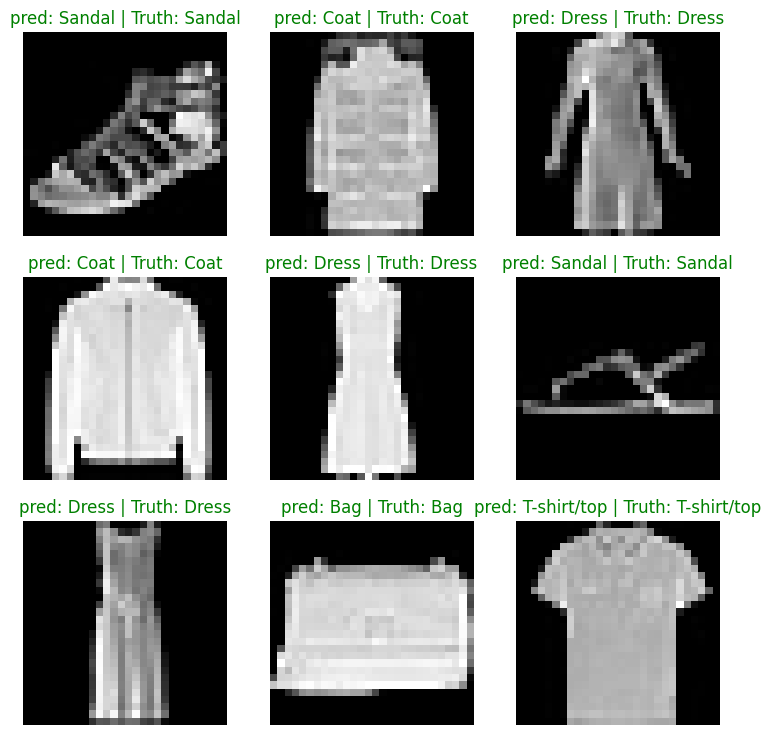

In [76]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    pred_label=class_names[pred_classes[i]]
    
    truth_label=class_names[test_labels[i]]
    title_text=f"pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label==truth_label:
        plt.title(title_text,c="g")
    else:
        plt.title(title_text,c="r")
    plt.axis(False)

## 7] Plot a confusion matrix comparing your model's predictions to the truth labels.


In [77]:
from tqdm.auto import tqdm

y_preds=[]
model_e.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="making predictions"):
        X, y=X.to(device), y.to(device)
        
        y_logit=model_e(X)
        
        y_pred=torch.softmax(y_logit, dim=1).argmax(dim=1) # perform softmXax on the "logits" dimension, not "batch" dimension(in this case we have a batch size of 32, so we can preform on dim=1)
        
        y_preds.append(y_pred.cpu())
        
y_pred_tensor=torch.cat(y_preds)

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

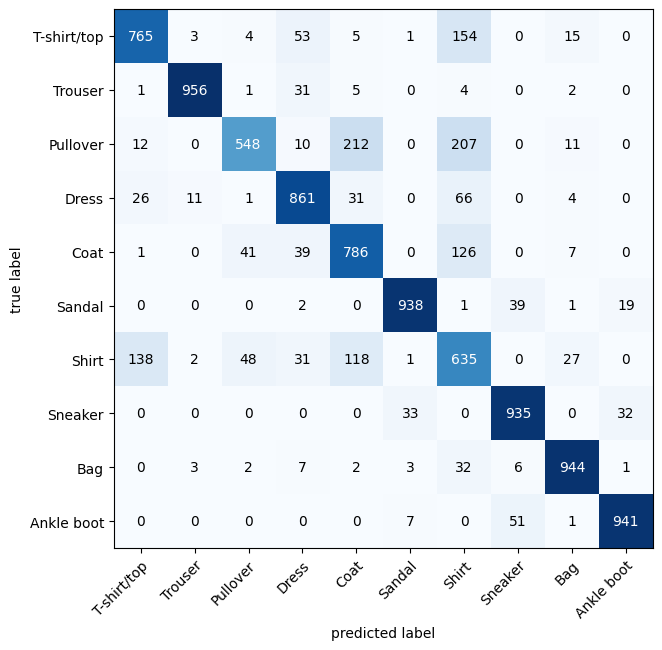

In [78]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor=confmat(y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(18,7)
)

## 8] Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?


In [79]:
torch.manual_seed(29)

images=torch.randn(size=(1,3,64,64))

test_image=images[0]

print(f"{images.shape} -> [batch_size, color_channels, height,width]")
print(f"{test_image.shape} -> [color_channels, height,width]")
print(test_image)

torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height,width]
torch.Size([3, 64, 64]) -> [color_channels, height,width]
tensor([[[ 4.0617e-01, -1.0406e+00,  1.1034e+00,  ..., -5.2968e-01,
           5.6249e-01,  6.4274e-01],
         [-5.2064e-01, -7.9903e-01, -7.3069e-01,  ...,  3.8110e-01,
          -5.1557e-01, -1.4197e+00],
         [-1.0653e+00, -3.9297e-01, -3.6014e-01,  ..., -3.7003e-01,
          -3.7279e-01,  1.3251e+00],
         ...,
         [-6.0478e-01,  9.4040e-01, -1.0730e+00,  ...,  5.1264e-02,
          -2.9131e-01, -1.8820e+00],
         [ 3.3276e-01,  2.1421e-01,  5.8760e-01,  ...,  1.2316e+00,
           7.0367e-01,  7.7974e-01],
         [-1.3960e+00, -1.4287e+00, -3.2658e-01,  ..., -8.1370e-02,
           1.9714e-01,  2.6108e-01]],

        [[ 2.6890e-04,  7.6654e-01,  8.5702e-02,  ..., -1.7009e+00,
           4.9095e-02, -2.3881e-01],
         [-1.3139e+00, -8.9248e-01,  2.0874e+00,  ...,  3.5698e-02,
          -9.0322e-01,  9.0033e-02],
         [ 1.

In [80]:
torch.manual_seed(29)

#createa convolutional layer with same dimensoins as tinyVGG
conv_layer=nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=3,
                    stride=2,
                    padding=1)
img=conv_layer(test_image)

In [81]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 32, 32])

## 9] Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.


## 10] Then plot some predictions where the model was wrong alongside what the label of the image should've been.


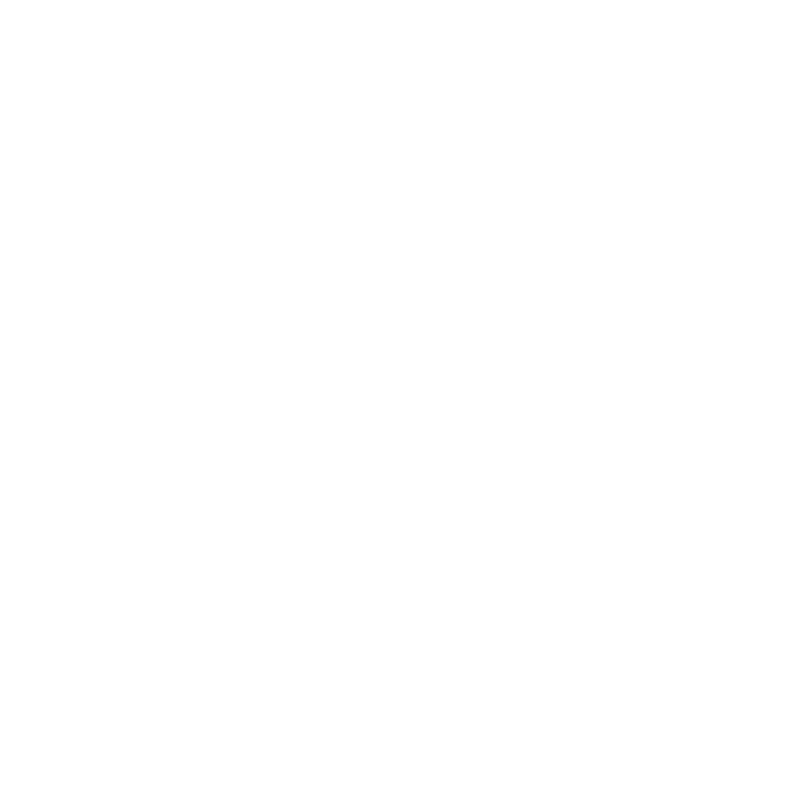

In [82]:
plt.figure(figsize=(10,10))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
#     plt.imshow(sample.squeeze(),cmap="gray")
    pred_label=class_names[pred_classes[i]]
    
    truth_label=class_names[test_labels[i]]
    title_text=f"pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label!=truth_label:
        plt.imshow(sample.squeeze(),cmap="gray")
        plt.title(title_text,c="r")
    
    plt.axis(False)

## 11] After visualing these predictions do you think it's more of a modelling error or a data error?


#### -> there is no any kind of wrong labels